In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
import pandas as pd

In [2]:
def rxn1(Y,z):
    Fc, Fch4, Fco, Fco2, Fh2, Fh2o, T, Tolivine, P = Y
    diagasifier = 2.5 # m
    a2 = 1 / diagasifier
    R = 8.314 * 10 ** (-5) # gas constant, m^3.bar/K.mol
    U2 = 225 * 1000 # W/m^2.K
    Wolivine = 1000 # kg
    sph = 0.9 # sphericity of olivine
    h = 0 # distributor plate height m
    uo = 0.135 # m/s
    g = 9.18 # m2/s
    MWc = 12 / 1000 # molecular weight of carbon, kg/mol
    A = 3.14 * (diagasifier ** 2) / 4 # m^2
    volflowrate = uo * A # m^3/s
    
    Cs = Fc / volflowrate
    Tref = 800 + 273 # K
    diaolivine = 400 * 10 ** -6 # m

    Cpc = 21.175 - 0.812 * T + 0.4485 * (T ** 2) + 0.4485 * (T ** 3) - 0.043 * (T ** 4) - 0.013 / (T **2) # J/mol.K
    Cpch4 = 36.155 - 0.511 / 10 * T + 2.215 / (10 ** 4) * (T ** 2) - 1.824 / (10 ** 7) * (T ** 3) + 4.899 / (10 ** 11) * (T ** 4) # J/mol.K
    Cpco = 29.651 - 0.007 / 10 * T + 0.813 / (10 ** 4) * (T ** 2) - 0.094 / (10 ** 7) * (T ** 3) + 0.108 / (10 ** 11) * (T ** 4) # J/mol.K
    Cpco2 = 29.268 - 0.224 / 10 * T + 2.653 / (10 ** 4) * (T ** 2) - 4.153 / (10 ** 7) * (T ** 3) + 20.057 / (10 ** 11) * (T ** 4) # J/mol.K
    Cph2 = 27.004 + 0.119 / 10 * T - 0.241 / (10 ** 4) * (T ** 2) + 0.215 / (10 ** 7) * (T ** 3) - 0.615 / (10 ** 11) * (T ** 4) # J/mol.K
    Cph2o = 33.763 - 0.006 / 10 * T + 0.224 / (10 ** 4) * (T ** 2) - 0.1 / (10 ** 7) * (T ** 3) + 0.11 / (10 ** 11) * (T ** 4) # J/mol.K

    H1ref = 136 * 1000 # J/mol
    H2ref = 173 * 1000
    H3ref = -87 * 1000
    H4ref = -37 * 1000
    H5ref = 228 * 1000
    
    H1r = H1ref + (Cpco + Cph2 - Cph2o) * (T - Tref) # J/mol
    H1f = -H1r

    H2r = H2ref + (2 * Cpco - Cpco2) * (T - Tref)
    H2f = -H2r

    H3r = H3ref + (0.5 * Cpch4 - Cph2) * (T - Tref)
    H3f = -H3r

    H4r = H4ref + (Cpco2 + Cph2 - Cpco - Cph2o) * (T - Tref)
    H4f = -H4r
    
    H5r = H5ref + (Cpco + 3 * Cph2 - Cpch4 - Cph2o) * (T - Tref)
    H5f = -H5r
    
    rhoco = 1.165 # kg/m^3
    rhoco2 = 1.842 # kg/m^3
    rhoh2o = 0.048 # kg/m^3
    rhoh2 = 0.0899 # kg/m^3
    rhoch4 = 0.668 # kg/m^3
    
    MWc = 12 / 1000
    MWco = 28.01 / 1000 # kg/mol
    MWco2 = 44.01 / 1000 # kg/mol
    MWh2o = 18.01 / 1000 # kg/mol
    MWh2 = 2.01 / 1000 # kg/mol
    MWch4 = 16.04 / 1000 # kg/mol
    
    ms = MWc * Cs
    
    Ftotal = Fco + Fco2 + Fh2o + Fch4 + Fh2
    yco = Fco / Ftotal # molar composition
    yco2 = Fco2 / Ftotal
    yh2o = Fh2o / Ftotal
    ych4 = Fch4 / Ftotal
    yh2 = Fh2 / Ftotal
    
    viscoco = (10 ** (94.06 * ((1 / T) - (1 / 48.9)))) * (10 ** -3) # Pa.s
    viscoco2 = (10 ** (578.08 * ((1 / T) - (1 / 185.24)))) * (10 ** -3) # Pa.s
    viscoh2o = (10 ** (658.25 * ((1 / T) - (1 / 283.16)))) * (10 ** -3) # Pa.s
    viscoh2 = (10 ** (13.82 * ((1 / T) - (1 / 5.39)))) * (10 ** -3) # Pa.s
    viscoch4 = (10 ** (114.14 * ((1 / T) - (1 / 57.6)))) * (10 ** -3) # Pa.s
    viscosity = yco * viscoco + yco2 * viscoco2 + yh2o * viscoh2o + yh2 * viscoh2 + ych4 * viscoch4 # Pa.s
    
    epsmf = (0.071/sph) ** (1 / 3)
    V = A * z # reactor volume, m^3

    
    rhoolivine = 995.1 + 1343 * (T ** -0.5) - 2.887 * (10 ** 7) * (T ** -2) - 6.166 * (10 ** -2) * (T ** -3) # kg/m^3
    rhogas = yco * rhoco + yco2 * rhoco2 + yh2o * rhoh2o + yh2 * rhoh2 + ych4 * rhoch4 # kg/m^3
    
    epsmf = (0.071/sph) ** (1 / 3)
    sph = 0.9 # sphericity of olivine
    
    umf = ((sph * diaolivine) ** 2) * g * (rhoolivine - rhogas) * (epsmf **3) / (1 - epsmf) / 150 / viscosity # m/s
    Remf = diaolivine * umf * rhogas / viscosity
    dbm = 0.652 * (A * (uo - umf)) ** 0.4 # m
    dbo = 0.00376 * (uo - umf) ** 2 # m
    db = dbm - ((dbm - dbo) * np.exp(-0.3 * h / diagasifier)) # m
    ub = uo - umf + (0.71 * (g * db) ** (1 / 2)) # m/s
    
    
    Ch2o = P * yh2o / R / T # molar concentration, mol/m^3
    Ch2 = P * yh2 / R / T
    Cco = P * yco / R / T
    Cco2 = P * yco2 / R / T
    Cch4 = P * ych4 / R / T
    
    r1f = 1.272 * ms * T * np.exp(-22645 / T) * Ch2o # mol/m^3.s
    r1r = 1.044 * 10 ** (-4) * ms * T ** 2 * np.exp((-6319 / T) - 17.29) * Ch2 * Cco # mol/m^3.s

    r2f = 1.272 * ms * T * np.exp(-22645 / T) * Cco2 # mol/m^3.s
    r2r = 1.044 * 10 ** (-4) * ms * T ** 2 * np.exp(-2363 / T - 20.92) * Cco ** 2 # mol/m^3.s

    r3f = 1.368 * 10 ** (-3) * ms * T * np.exp(-8078 / T - 7.087) * Ch2 # mol/m^3.s
    r3r = 0.151 * ms * T ** 0.5 * np.exp(-13578 / T - 0.372) * Cch4 ** 0.5 # mol/m^3.s

    r4f = 7.68 * 10 ** 10 * T * np.exp(-36640 / T) * Cco ** 0.5 * Ch2o # mol/m^3.s
    r4r = 6.4 * 10 ** 9 * T * np.exp(-39260 / T) * Ch2 ** 0.5 * Cco2 # mol/m^3.s

    r5f = 3.1005 * np.exp(-15000 / T) * Cch4 * Ch2o # mol/m^3.s
    r5r = 3.556 * 10 ** (-3) * T * np.exp(-15000 / T) * Cco * Ch2 ** 2 # mol/m^3.s
    
    nu = g * (rhoolivine - rhogas)
    ut = ((1.78 * (10 ** -2) * (nu ** 2) / rhogas / viscosity) ** (1 / 3)) * diaolivine # m/s
    Rep = diaolivine * ut * rhogas / viscosity
    eps = epsmf * ((Rep + 0.02 * (Rep ** 2)) / (Remf + 0.02 * (Remf ** 2))) ** 0.21
    Cpolivine = 995.1 + (1343 * Tolivine ** 0.5) - 2.887 * (10 ** 7) * (Tolivine ** -2) - 6.166 * (10 ** -2) * (Tolivine ** -3) # J/kg.K
    bedheight = Wolivine / (1 - eps) / A / rhoolivine # m
    
    dFcdz = A * (r1r - r1f + r2r - r2f + 0.5 * r3r - 0.5 * r3f)
    
    dFch4dz = A * (0.5 * r3f - 0.5 * r3r + r5r - r5f)
    
    dFcodz = A * (r1f - r1r + 2 * r1f - 2 * r1r + r4r - r4f + r5f - r5r)
    
    dFco2dz = A * (r2r - r2f + r4f - r4r)
    
    dFh2dz = A * (r1f - r1r + r3r - r3f + r4f - r4r + 3 * r5f - 3 * r4r)
    
    dFh2odz = A * (r1r - r1f + r4r - r4f + r5r - r5f)
    
    dTdz = A * (-(r1r * H1r + r1f * H1f + r2r * H2r + r2f * H2f + r3r * H3r + r3f * H3f + r4r * H4r + r4f * H4f + r5r * H5r + r5f * H5f)) / (Fc * Cpc + Fco * Cpco + Fco2 * Cpco2 + Fh2 * Cph2 + Fh2o * Cph2o + Fch4 * Cpch4)
    dTolivinedz = A * U2 * a2 * (T - Tolivine) / Wolivine / Cpolivine
    
    dPdz = -g * (1 - eps) * (rhoolivine - rhogas) * bedheight * 10 ** -5
    
    return [dFcdz, dFch4dz, dFcodz, dFco2dz, dFh2dz, dFh2odz, dTdz, dTolivinedz, dPdz]

In [3]:
z0 = np.linspace(0,20,100)
Y0 = [20, 20, 63, 10, 21, 86, 1055, 1600, 1.5]
y=odeint(rxn1, Y0, z0)

In [4]:
dFcdz = y[:,0]
dFch4dz = y[:,1]
dFcodz = y[:,2]
dFco2dz = y[:,3]
dFh2dz = y[:,4]
dFh2odz = y[:,5]
dTdz = y[:,6]
dTolivinedz = y[:,7]
dPdz = y[:,8]

Text(0,0.5,'F(mol/s)')

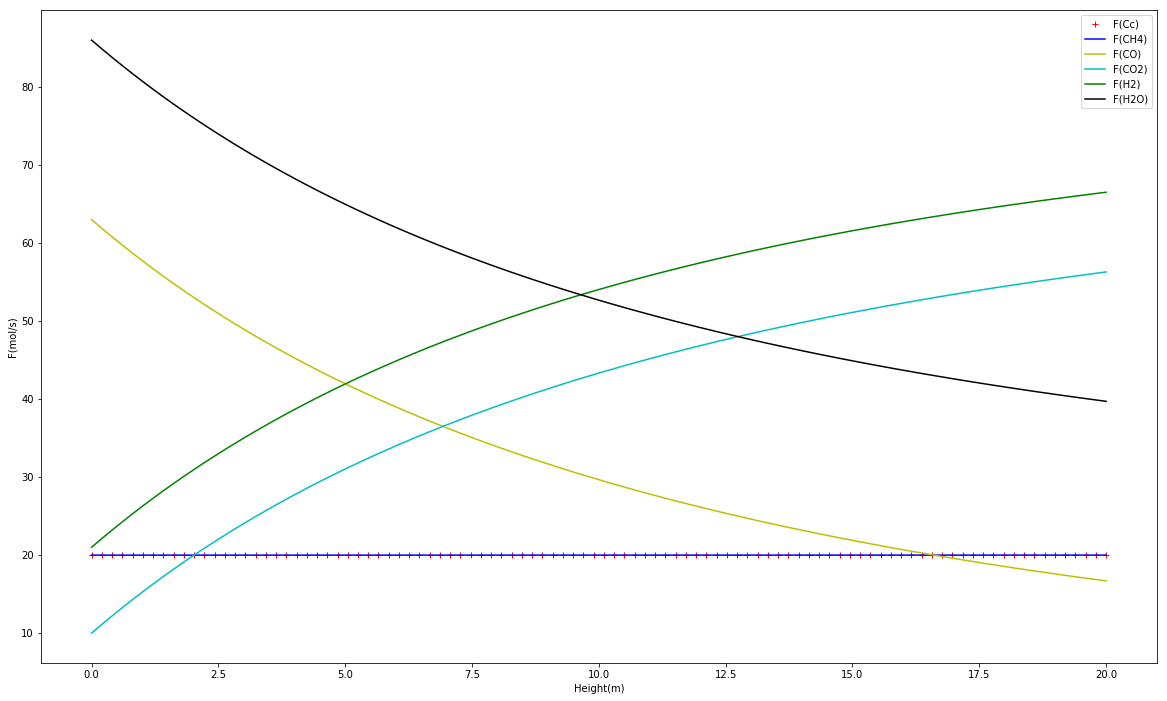

In [5]:
plt.figure(figsize=(20,12))
plt.plot(z0,dFcdz, "r+", label="F(Cc)")
plt.plot(z0,dFch4dz, "b-", label="F(CH4)")
plt.plot(z0,dFcodz, "y-", label="F(CO)")
plt.plot(z0,dFco2dz, "c-", label="F(CO2)")
plt.plot(z0,dFh2dz, "g-", label="F(H2)")
plt.plot(z0,dFh2odz, "k-", label="F(H2O)")

plt.legend()
plt.xlabel("Height(m)")
plt.ylabel("F(mol/s)")

Text(0,0.5,'Temp')

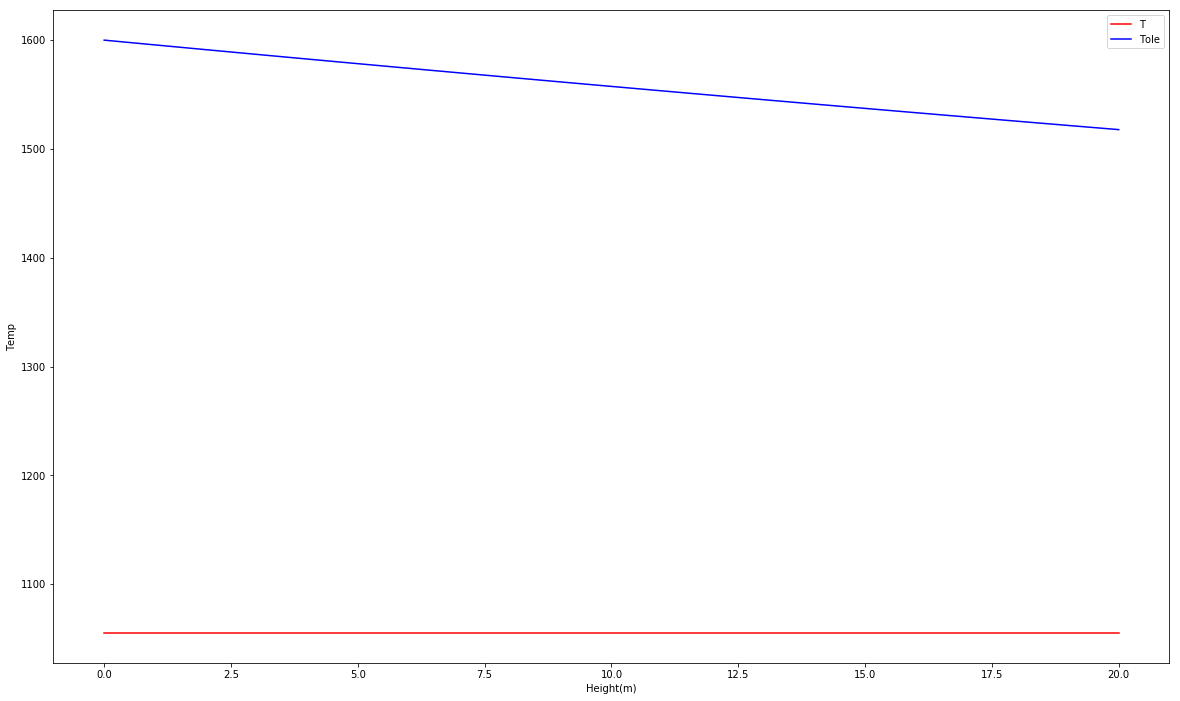

In [6]:
plt.figure(figsize=(20,12))
plt.plot(z0,dTdz, "r-", label="T")
plt.plot(z0,dTolivinedz, "b-", label="Tole")

plt.legend()
plt.xlabel("Height(m)")
plt.ylabel("Temp")

Text(0,0.5,'Pressure')

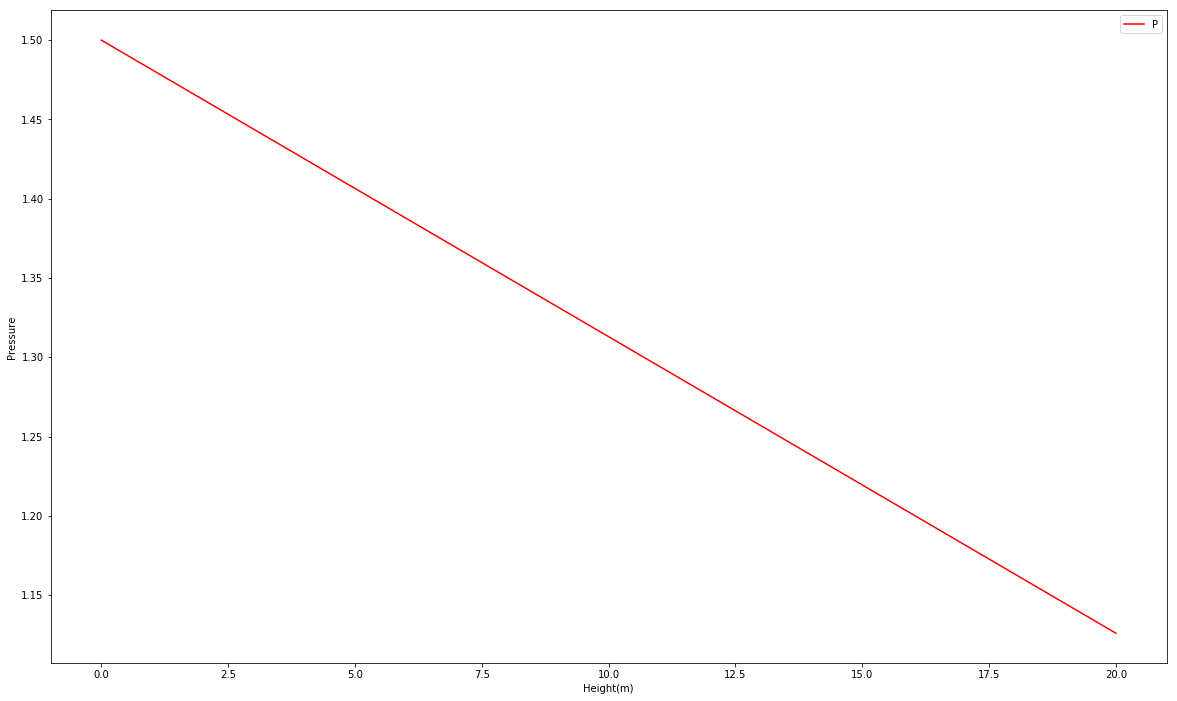

In [7]:
plt.figure(figsize=(20,12))
plt.plot(z0,dPdz, "r-", label="P")
plt.legend("P")
plt.xlabel("Height(m)")
plt.ylabel("Pressure")